In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [124]:
airlines = pd.read_csv("./airlines.csv")
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [125]:
airlines.describe()

,IATA_CODE,AIRLINE
count,14,14
unique,14,14
top,AS,JetBlue Airways
freq,1,1


In [126]:
airports= pd.read_csv('./airports.csv')
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [127]:
airports.describe()

,LATITUDE,LONGITUDE
count,319.000000,319.000000
mean,38.981244,-98.378964
std,8.616736,21.523492
min,13.483450,-176.646030
25%,33.652040,-110.839385
50%,39.297610,-93.403070
75%,43.154675,-82.722995
max,71.285450,-64.798560


In [128]:
flights = pd.read_csv('./flights.csv.zip', low_memory=False)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
[char for char in "ANC1772" if char in ('1','2') ]

['1', '2']

In [130]:
set("ANC1772").intersection({'','2'})


{'2'}

In [131]:
set("abc9") & set([str(x) for x in range(0,10)]) 

{'9'}

In [132]:
(set("ANC77") & set('12') )== set()
x="ANC7"
(set(x)& set([str(x) for x in range(0,10)]))== set()

False

In [133]:
flights.ORIGIN_AIRPORT[flights.ORIGIN_AIRPORT.apply(lambda x: (set(x)& set([str(x) for x in range(0,10)]))== set())].unique()

array(['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'DEN', 'SLC', 'PDX', 'FAI',
       'MSP', 'PHX', 'SJU', 'PBG', 'IAG', 'PSE', 'BQN', 'ORD', 'GEG',
       'HNL', 'ONT', 'MCO', 'BOS', 'HIB', 'ABR', 'MAF', 'DFW', 'MKE',
       'IAH', 'BNA', 'BRO', 'VPS', 'BOI', 'BJI', 'SGF', 'PHL', 'SBN',
       'RDD', 'EUG', 'IAD', 'BUF', 'PWM', 'JFK', 'CRP', 'PIA', 'FAT',
       'SMF', 'AUS', 'MCI', 'ATL', 'JAX', 'MFR', 'IDA', 'MSN', 'DCA',
       'SAT', 'CHS', 'SBA', 'SMX', 'IND', 'CLE', 'GSP', 'BDL', 'ABI',
       'RIC', 'BFL', 'OMA', 'RDM', 'FLL', 'CID', 'TPA', 'SYR', 'ROC',
       'TYR', 'LAN', 'XNA', 'GSO', 'EWR', 'PBI', 'RSW', 'OAK', 'PVD',
       'RNO', 'PIT', 'ABQ', 'MIA', 'BWI', 'LGA', 'TUL', 'LIT', 'MSY',
       'OKC', 'ATW', 'PNS', 'MEM', 'TYS', 'MHT', 'SAV', 'CLT', 'GRB',
       'ABE', 'JAN', 'OAJ', 'FAR', 'ERI', 'LEX', 'CWA', 'MSO', 'TTN',
       'AMA', 'CLL', 'HOU', 'JLN', 'MLI', 'RDU', 'CVG', 'MHK', 'MOB',
       'TLH', 'BHM', 'CAE', 'TXK', 'ACY', 'DTW', 'RAP', 'TUS', 'EAU',
       'DLH', 'FSD',

In [139]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [140]:
 print(flights.AIRLINE.unique())

['AS' 'AA' 'US' 'DL' 'NK' 'UA' 'HA' 'B6' 'OO' 'EV' 'MQ' 'F9' 'WN' 'VX']


In [141]:
 print(flights.ORIGIN_AIRPORT.unique())

['ANC' 'LAX' 'SFO' 'SEA' 'LAS' 'DEN' 'SLC' 'PDX' 'FAI' 'MSP' 'PHX' 'SJU'
 'PBG' 'IAG' 'PSE' 'BQN' 'ORD' 'GEG' 'HNL' 'ONT' 'MCO' 'BOS' 'HIB' 'ABR'
 'MAF' 'DFW' 'MKE' 'IAH' 'BNA' 'BRO' 'VPS' 'BOI' 'BJI' 'SGF' 'PHL' 'SBN'
 'RDD' 'EUG' 'IAD' 'BUF' 'PWM' 'JFK' 'CRP' 'PIA' 'FAT' 'SMF' 'AUS' 'MCI'
 'ATL' 'JAX' 'MFR' 'IDA' 'MSN' 'DCA' 'SAT' 'CHS' 'SBA' 'SMX' 'IND' 'CLE'
 'GSP' 'BDL' 'ABI' 'RIC' 'BFL' 'OMA' 'RDM' 'FLL' 'CID' 'TPA' 'SYR' 'ROC'
 'TYR' 'LAN' 'XNA' 'GSO' 'EWR' 'PBI' 'RSW' 'OAK' 'PVD' 'RNO' 'PIT' 'ABQ'
 'MIA' 'BWI' 'LGA' 'TUL' 'LIT' 'MSY' 'OKC' 'ATW' 'PNS' 'MEM' 'TYS' 'MHT'
 'SAV' 'CLT' 'GRB' 'ABE' 'JAN' 'OAJ' 'FAR' 'ERI' 'LEX' 'CWA' 'MSO' 'TTN'
 'AMA' 'CLL' 'HOU' 'JLN' 'MLI' 'RDU' 'CVG' 'MHK' 'MOB' 'TLH' 'BHM' 'CAE'
 'TXK' 'ACY' 'DTW' 'RAP' 'TUS' 'EAU' 'DLH' 'FSD' 'INL' 'CMX' 'SPI' 'CLD'
 'COD' 'CMH' 'LRD' 'PSC' 'CPR' 'ACV' 'DAL' 'PAH' 'MRY' 'ESC' 'ISN' 'PSP'
 'MFE' 'STL' 'BTV' 'FSM' 'AEX' 'SPS' 'ACT' 'SJT' 'MTJ' 'GCC' 'OGG' 'SJC'
 'GUC' 'ORF' 'MOT' 'MLU' 'KOA' 'SAN' 'LAW' 'PIB' 'M

In [142]:
 print(flights.DESTINATION_AIRPORT.unique())

['SEA' 'PBI' 'CLT' 'MIA' 'ANC' 'MSP' 'DFW' 'ATL' 'IAH' 'PDX' 'MCI' 'FLL'
 'ORD' 'HNL' 'PHX' 'EWR' 'JFK' 'MCO' 'BOS' 'BDL' 'ITO' 'SFO' 'KOA' 'OGG'
 'MYR' 'DTW' 'LIH' 'DEN' 'SJU' 'LAX' 'BWI' 'IAD' 'BQN' 'BUF' 'LGA' 'HOU'
 'SLC' 'PHL' 'SJC' 'OAK' 'LGB' 'TPA' 'DCA' 'TTN' 'BTR' 'LAS' 'RSW' 'BRD'
 'STL' 'RKS' 'MBS' 'SNA' 'MEI' 'MDW' 'SAN' 'RIC' 'AUS' 'OTZ' 'PIT' 'JAX'
 'MSY' 'ONT' 'PSP' 'BUR' 'DAL' 'CVG' 'SMF' 'RDU' 'JMS' 'BNA' 'DSM' 'MAF'
 'BOI' 'ELP' 'TUS' 'SCC' 'HPN' 'STT' 'MDT' 'RHI' 'SBP' 'MKE' 'JNU' 'CMH'
 'CLD' 'KTN' 'CAK' 'CRP' 'CLE' 'GPT' 'SHV' 'TYS' 'IND' 'LIT' 'SAT' 'SRQ'
 'TUL' 'GRK' 'PNS' 'BTV' 'CHS' 'DAY' 'OKC' 'SAV' 'XNA' 'COS' 'GJT' 'BZN'
 'PUB' 'HRL' 'HDN' 'MEM' 'GEG' 'ORH' 'SYR' 'GSO' 'VPS' 'LAW' 'ACY' 'LBB'
 'JAC' 'BIL' 'EUG' 'ASE' 'TVC' 'MTJ' 'CAE' 'PVD' 'HSV' 'CDC' 'YUM' 'ABQ'
 'TLH' 'MLI' 'AMA' 'EGE' 'MOB' 'JAN' 'FWA' 'MSN' 'BIS' 'MFR' 'APN' 'BHM'
 'OMA' 'LFT' 'GRR' 'MMH' 'CEC' 'SBA' 'RNO' 'CLL' 'LEX' 'LAN' 'DLH' 'SDF'
 'FAT' 'SPS' 'SGF' 'CID' 'FSM' 'MGM' 'MFE' 'AVP' 'S

In [143]:
print (airlines.shape)
print (airports.shape)
print (flights.shape)

(14, 2)
(322, 7)
(5819079, 31)


In [144]:
#Looking for null values in airlines data
for col in airlines:
    print ("%d NULL values are found in column %s" % (airlines[col].isnull().sum().sum(), col))

0 NULL values are found in column IATA_CODE
0 NULL values are found in column AIRLINE


In [145]:
#Looking for null values in airport data
for col in airports:
    print ("%d NULL values are found in column %s" % (airports[col].isnull().sum().sum(), col))

0 NULL values are found in column IATA_CODE
0 NULL values are found in column AIRPORT
0 NULL values are found in column CITY
0 NULL values are found in column STATE
0 NULL values are found in column COUNTRY
3 NULL values are found in column LATITUDE
3 NULL values are found in column LONGITUDE


In [146]:
#Looking for null values in flights data
for col in flights:
    print ("%d NULL values are found in column %s" % (flights[col].isnull().sum().sum(), col))

0 NULL values are found in column YEAR
0 NULL values are found in column MONTH
0 NULL values are found in column DAY
0 NULL values are found in column DAY_OF_WEEK
0 NULL values are found in column AIRLINE
0 NULL values are found in column FLIGHT_NUMBER
14721 NULL values are found in column TAIL_NUMBER
0 NULL values are found in column ORIGIN_AIRPORT
0 NULL values are found in column DESTINATION_AIRPORT
0 NULL values are found in column SCHEDULED_DEPARTURE
86153 NULL values are found in column DEPARTURE_TIME
86153 NULL values are found in column DEPARTURE_DELAY
89047 NULL values are found in column TAXI_OUT
89047 NULL values are found in column WHEELS_OFF
6 NULL values are found in column SCHEDULED_TIME
105071 NULL values are found in column ELAPSED_TIME
105071 NULL values are found in column AIR_TIME
0 NULL values are found in column DISTANCE
92513 NULL values are found in column WHEELS_ON
92513 NULL values are found in column TAXI_IN
0 NULL values are found in column SCHEDULED_ARRIVAL

In [147]:
#Checking if numbers match between flights cancelled and reasons cancelled
print (flights.shape[0]*flights.CANCELLED.mean())
print (flights.shape[0] - flights.CANCELLATION_REASON.isnull().sum().sum())

89884.0
89884


In [148]:
#Want to join airports and airlines lookup data to flight data

In [149]:
airlines_dict = dict(zip(airlines['IATA_CODE'],airlines['AIRLINE']))
airlines_dict

{'AA': 'American Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'B6': 'JetBlue Airways',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'F9': 'Frontier Airlines Inc.',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'OO': 'Skywest Airlines Inc.',
 'UA': 'United Air Lines Inc.',
 'US': 'US Airways Inc.',
 'VX': 'Virgin America',
 'WN': 'Southwest Airlines Co.'}

In [150]:
airports_dict = dict(zip(airports['IATA_CODE'],airports['AIRPORT']))
airports_dict

{'ABE': 'Lehigh Valley International Airport',
 'ABI': 'Abilene Regional Airport',
 'ABQ': 'Albuquerque International Sunport',
 'ABR': 'Aberdeen Regional Airport',
 'ABY': 'Southwest Georgia Regional Airport',
 'ACK': 'Nantucket Memorial Airport',
 'ACT': 'Waco Regional Airport',
 'ACV': 'Arcata Airport',
 'ACY': 'Atlantic City International Airport',
 'ADK': 'Adak Airport',
 'ADQ': 'Kodiak Airport',
 'AEX': 'Alexandria International Airport',
 'AGS': 'Augusta Regional Airport\xc2\xa0(Bush Field)',
 'AKN': 'King Salmon Airport',
 'ALB': 'Albany International Airport',
 'ALO': 'Waterloo Regional Airport',
 'AMA': 'Rick Husband Amarillo International Airport',
 'ANC': 'Ted Stevens Anchorage International Airport',
 'APN': 'Alpena County Regional Airport',
 'ASE': 'Aspen-Pitkin County Airport',
 'ATL': 'Hartsfield-Jackson Atlanta International Airport',
 'ATW': 'Appleton International Airport',
 'AUS': 'Austin-Bergstrom International Airport',
 'AVL': 'Asheville Regional Airport',
 'AVP'

In [151]:

#flights['AIRLINE_NAME'] = flights['AIRLINE'].apply(lambda a: airlines_dict[a])
#flights['AIRPORT_NAME_ORIGIN'] = flights['ORIGIN_AIRPORT'].apply(lambda a: airports_dict[a])
#flights['AIRPORT_NAME_DEST'] = flights['DESTINATION_AIRPORT'].apply(lambda a: airports_dict[a])
#flights.head()

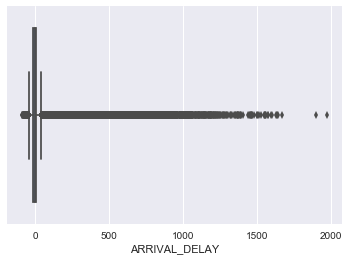

In [152]:
ArrivalDelayBox= sns.boxplot(x=flights["ARRIVAL_DELAY"])

In [ ]:
#Want to show average arrival delay by month
flights.ARRIVAL_DELAY.mean()


4.407057357987598

In [ ]:
flights.plot(kind='line', x='MONTH', y='ARRIVAL_DELAY')

In [ ]:
g = sns.lmplot('DAY', 'ARRIVAL_DELAY', flights)
g.set_axis_labels( "DAY", "ARRIVAL_DELAY")

In [ ]:
lm = smf.ols(formula='ARRIVAL_DELAY ~ DAY_OF_WEEK', data=flights).fit()
lm.summary()